In [16]:
import numpy as np
from proofreader.utils.io import read_cremi_volume, from_h5
from proofreader.utils.data import get_unique_sorted_by_count
from proofreader.utils.vis import grid_volume

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
def view_volume(volume, fig_size=6.5):
    length = volume.shape[0]

    # set up
    fig = plt.figure()
    fig.set_size_inches(fig_size, fig_size)
    axes = fig.add_subplot()
    hfig = display(fig, display_id=True)

    # display
    for i in range(length):
        axes.imshow(volume[i], cmap='gray', interpolation='none',
                    filternorm=False, resample=False)
        fig.canvas.draw()
        hfig.update(fig)
        if i != length-1:
            plt.cla()
    # clean up
    IPython.display.clear_output()


In [2]:
segA = read_cremi_volume('A',seg=True, path='../../dataset/cremi')
segB = read_cremi_volume('B',seg=True, path='../../dataset/cremi')
segC = read_cremi_volume('C',seg=True, path='../../dataset/cremi')

In [26]:
from skimage import color
segA = color.label2rgb(segA, bg_label=0)

/var/folders/2r/rs32rxl95jsbfxz20l02mnw40000gn/T/ipykernel_13705/1346373665.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segA = color.label2rgb(segA)


KeyboardInterrupt: 

In [3]:
imgA = read_cremi_volume('A', img=True, path='../../dataset/cremi')
imgB = read_cremi_volume('B', img=True, path='../../dataset/cremi')
imgC = read_cremi_volume('C', img=True, path='../../dataset/cremi')


In [8]:
classes, counts = get_unique_sorted_by_count(segA, return_counts=True, reverse=True)

In [43]:
from proofreader.utils.data import crop_where
from skimage.color import label2rgb
from skimage.segmentation import find_boundaries
c = classes[41]
cropped = crop_where(segA, segA == c)
cropped[cropped != c] = 0
border = find_boundaries(cropped, mode='inner').astype(np.uint8)
border = label2rgb(border, bg_label=0)

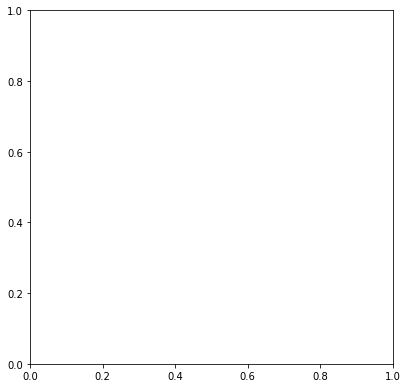

NameError: name 'IPython' is not defined

In [44]:
view_volume(border)